In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

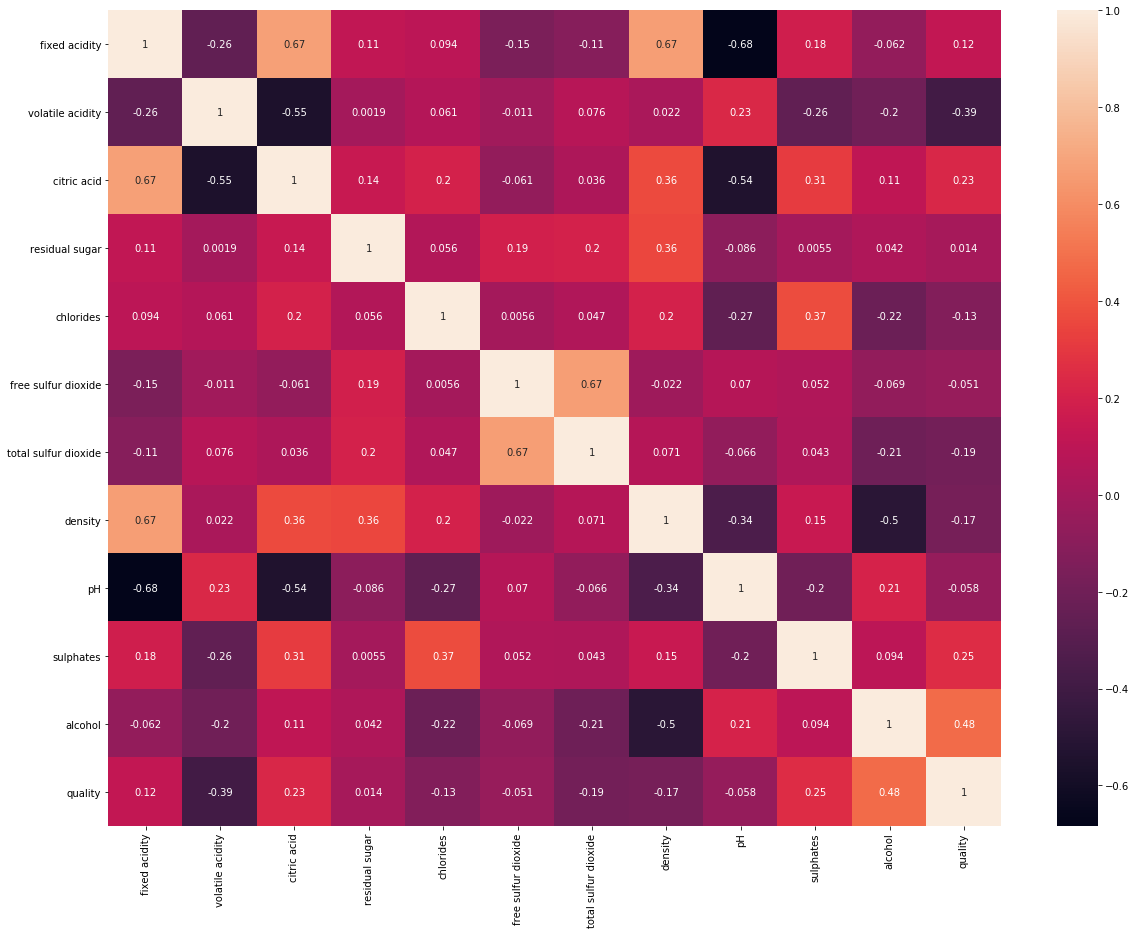

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [15]:
y = df['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [13]:
x = df.drop(['quality'],axis=1)

In [14]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [17]:
from sklearn.model_selection import train_test_split


In [35]:
x_train,x_test ,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=5)

In [36]:
y_train.value_counts()

5    545
6    510
7    159
4     42
8     15
3      8
Name: quality, dtype: int64

In [37]:
y_test.value_counts()

5    136
6    128
7     40
4     11
8      3
3      2
Name: quality, dtype: int64

In [38]:
from sklearn.linear_model import LogisticRegression as LogR

In [39]:
logr = LogR(max_iter=10000)

In [40]:
logr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
pred = logr.predict(x_test)

In [42]:
pred

array([6, 5, 5, 7, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 7, 5, 5, 5, 5, 5, 5,
       6, 5, 7, 6, 6, 6, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5,
       5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6,
       5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6,
       6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5,
       6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 7, 5, 6, 5, 7,
       5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 7, 5, 6, 5, 5, 5, 6, 6,
       7, 5, 6, 6, 6, 5, 7, 6, 5, 5, 7, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6,
       5, 5, 6, 5, 5, 7, 5, 6, 7, 6, 6, 3, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5,
       6, 5, 7, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 7, 6, 6, 6, 5, 7, 5, 5,
       5, 6, 6, 5, 5, 5, 6, 7, 6, 6, 5, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 6,
       6, 6, 6, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6,
       5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 7, 6, 5, 6, 7, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6,

In [43]:
accuracy = (sum(pred==y_test)/y_test.shape[0])*100
print(accuracy)

61.5625
